### First baseline model

In [8]:
import numpy as np
import pandas as pd
import sklearn as sk
import plotly
import plotly.express as px
import seaborn as sns



In [32]:
def metric(preds, actuals):
    preds = preds.reshape(-1)
    actuals = actuals.reshape(-1)
    assert preds.shape == actuals.shape
    return 100 * np.linalg.norm((actuals - preds) / actuals) / np.sqrt(preds.shape[0])

In [146]:
#import the two files and read them via pandas

store = pd.read_csv('../data/store.csv', index_col='Store')
train = pd.read_csv('../data/train.csv')

/opt/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3063: DtypeWarning: Columns (7) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [10]:
store.head()

,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
Store,,,,,,,,,
1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
2,a,a,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct"
3,a,a,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct"
4,c,c,620.0,9.0,2009.0,0,NaN,NaN,NaN
5,a,a,29910.0,4.0,2015.0,0,NaN,NaN,NaN


In [11]:
train.head()

,Date,Store,DayOfWeek,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
0,2013-01-01,1115.0,2.0,0.0,0.0,0.0,0.0,a,1.0
1,2013-01-01,379.0,2.0,0.0,0.0,0.0,0.0,a,1.0
2,2013-01-01,378.0,2.0,0.0,0.0,0.0,0.0,a,1.0
3,2013-01-01,377.0,2.0,0.0,0.0,0.0,0.0,a,1.0
4,2013-01-01,376.0,2.0,0.0,0.0,0.0,0.0,a,1.0


In [12]:
store.describe()

,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear
count,1112.000000,761.000000,761.000000,1115.000000,571.000000,571.000000
mean,5404.901079,7.224704,2008.668857,0.512108,23.595447,2011.763573
std,7663.174720,3.212348,6.195983,0.500078,14.141984,1.674935
min,20.000000,1.000000,1900.000000,0.000000,1.000000,2009.000000
25%,717.500000,4.000000,2006.000000,0.000000,13.000000,2011.000000
50%,2325.000000,8.000000,2010.000000,1.000000,22.000000,2012.000000
75%,6882.500000,10.000000,2013.000000,1.000000,37.000000,2013.000000
max,75860.000000,12.000000,2015.000000,1.000000,50.000000,2015.000000


In [13]:
train.describe()

,Store,DayOfWeek,Sales,Customers,Open,Promo,SchoolHoliday
count,618473.000000,618757.000000,618747.000000,618683.000000,618588.000000,618580.000000,618437.000000
mean,558.105623,3.994914,5668.015834,628.909831,0.829167,0.370447,0.173253
std,321.885545,1.997485,3809.655137,463.786905,0.376363,0.482925,0.378466
min,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,279.000000,2.000000,3640.000000,397.000000,1.000000,0.000000,0.000000
50%,558.000000,4.000000,5625.000000,604.000000,1.000000,0.000000,0.000000
75%,837.000000,6.000000,7714.000000,833.000000,1.000000,1.000000,0.000000
max,1115.000000,7.000000,38037.000000,7388.000000,1.000000,1.000000,1.000000


In [14]:
train.isnull().any()

Date             False
Store             True
DayOfWeek         True
Sales             True
Customers         True
Open              True
Promo             True
StateHoliday      True
SchoolHoliday     True
dtype: bool

In [15]:
sum(train.Sales == 0)

105791

In [16]:
train.Date.max()

'2014-07-31'

In [249]:
#Merge the train data with store data
df = train.merge(store, how='left', on='Store')

In [18]:
df.count()

Date                         637774
Store                        618473
DayOfWeek                    618757
Sales                        618747
Customers                    618683
Open                         618588
Promo                        618580
StateHoliday                 618520
SchoolHoliday                618437
StoreType                    618473
Assortment                   618473
CompetitionDistance          616838
CompetitionOpenSinceMonth    422043
CompetitionOpenSinceYear     422043
Promo2                       618473
Promo2SinceWeek              314828
Promo2SinceYear              314828
PromoInterval                314828
dtype: int64

In [20]:
df = df.drop('Customers', axis=1)

In [21]:
df = df.dropna(subset=['Sales'])

In [22]:
df.count()

Date                         618747
Store                        600028
DayOfWeek                    600282
Sales                        618747
Open                         600125
Promo                        600053
StateHoliday                 600067
SchoolHoliday                599983
StoreType                    600028
Assortment                   600028
CompetitionDistance          598449
CompetitionOpenSinceMonth    409420
CompetitionOpenSinceYear     409420
Promo2                       600028
Promo2SinceWeek              305537
Promo2SinceYear              305537
PromoInterval                305537
dtype: int64

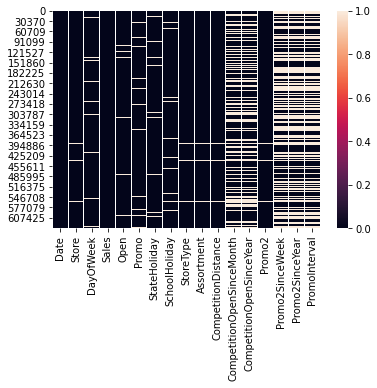

In [23]:
nulls = df.isnull()
sns.heatmap(nulls)

In [24]:
#checking some graphs to check for seasonality
sum_of_sales = df.groupby(by='Date').Sales.sum()

In [25]:
sum_of_sales

Date
2013-01-01      92200.0
2013-01-02    6788505.0
2013-01-03    6167913.0
2013-01-04    6462380.0
2013-01-05    5743875.0
                ...    
2014-07-27     242866.0
2014-07-28    8270451.0
2014-07-29    7139821.0
2014-07-30    7265673.0
2014-07-31    8092801.0
Name: Sales, Length: 577, dtype: float64

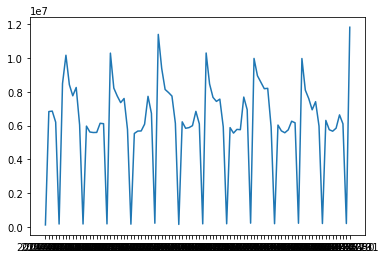

In [26]:
sns.lineplot(data=sum_of_sales.loc['2014-01-01':'2014-03-31'])

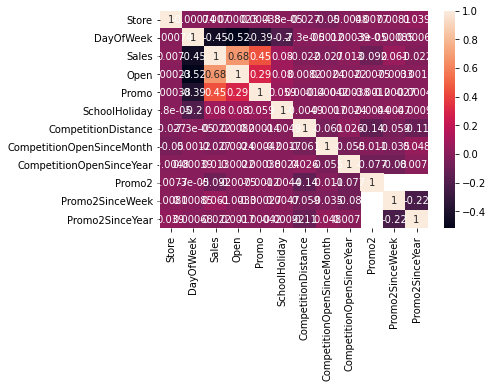

In [28]:
corrMatrix = df.corr()
sns.heatmap(corrMatrix, annot=True)


In [29]:
#remove the rows 
#remove where store is null
df = df.dropna(subset=['Store'])

In [30]:
df.count()

Date                         600028
Store                        600028
DayOfWeek                    582132
Sales                        600028
Open                         581941
Promo                        581838
StateHoliday                 581984
SchoolHoliday                581799
StoreType                    600028
Assortment                   600028
CompetitionDistance          598449
CompetitionOpenSinceMonth    409420
CompetitionOpenSinceYear     409420
Promo2                       600028
Promo2SinceWeek              305537
Promo2SinceYear              305537
PromoInterval                305537
dtype: int64

In [54]:
df.Date = pd.to_datetime(df.Date)

In [55]:
df.Date

0        2013-01-01
1        2013-01-01
2        2013-01-01
3        2013-01-01
4        2013-01-01
            ...    
637769   2014-07-31
637770   2014-07-31
637771   2014-07-31
637772   2014-07-31
637773   2014-07-31
Name: Date, Length: 600028, dtype: datetime64[ns]

In [56]:
#Split the training dataset into train and test

date_split = '2014-05-01'

df_train = df[df.Date < date_split]
df_test = df[df.Date >= date_split]

In [57]:
df_test.head()

,Date,Store,DayOfWeek,Sales,Open,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
540774,2014-05-01,372.0,4.0,0.0,0.0,1.0,a,0.0,d,c,4880.0,8.0,2010.0,1.0,18.0,2014.0,"Jan,Apr,Jul,Oct"
540775,2014-05-01,368.0,4.0,0.0,0.0,1.0,a,0.0,d,c,1450.0,4.0,2005.0,1.0,45.0,2009.0,"Feb,May,Aug,Nov"
540776,2014-05-01,369.0,4.0,0.0,0.0,1.0,a,0.0,d,c,5870.0,4.0,2014.0,0.0,NaN,NaN,NaN
540778,2014-05-01,371.0,4.0,0.0,0.0,1.0,a,0.0,d,c,1970.0,7.0,2009.0,1.0,45.0,2014.0,"Feb,May,Aug,Nov"
540779,2014-05-01,373.0,4.0,0.0,0.0,1.0,a,0.0,d,c,11120.0,NaN,NaN,1.0,22.0,2012.0,"Jan,Apr,Jul,Oct"


In [58]:
df_train.Date

0        2013-01-01
1        2013-01-01
2        2013-01-01
3        2013-01-01
4        2013-01-01
            ...    
540768   2014-04-30
540769   2014-04-30
540770   2014-04-30
540771   2014-04-30
540773   2014-04-30
Name: Date, Length: 508746, dtype: datetime64[ns]

In [45]:
df_test.count()

Date                         91282
Store                        91282
DayOfWeek                    88646
Sales                        91282
Open                         88532
Promo                        88393
StateHoliday                 88590
SchoolHoliday                88535
StoreType                    91282
Assortment                   91282
CompetitionDistance          91051
CompetitionOpenSinceMonth    62258
CompetitionOpenSinceYear     62258
Promo2                       91282
Promo2SinceWeek              44900
Promo2SinceYear              44900
PromoInterval                44900
dtype: int64

In [60]:
#Remove the days without sales:
df_train_base = df_train.copy()
df_test_base = df_test.copy()

In [64]:
df_train_base = df_train_base[df_train_base.Sales != 0]
df_test_base = df_test_base[df_test_base.Sales != 0]

In [63]:
df_train_base.shape

(422591, 17)

In [65]:
df_test_base.shape

(74785, 17)

In [67]:
#First model: average of sales

avg_sales = df_train_base.Sales.mean()

In [73]:
actuals = df_test_base.Sales
preds = np.full_like(actuals, avg_sales)

In [106]:
#transform to np array to compare
actuals = actuals.to_numpy()

In [108]:
base_model_1_res = metric(preds, actuals)

In [129]:
base_model_1_res

55.20378792814828

In [109]:
#Second model: average of sales depending on the day

avg_sales_per_weekday = df_train_base.groupby(by=['DayOfWeek']).Sales.mean()

In [114]:
avg_sales_per_weekday

DayOfWeek
1.0    8062.395064
2.0    6866.068819
3.0    6613.868475
4.0    6612.578129
5.0    6902.778456
6.0    5782.469497
7.0    7893.281613
Name: Sales, dtype: float64

In [111]:
sec_base_model = df_test_base.merge(avg_sales_per_weekday, how='left', on='DayOfWeek')

In [125]:
sec_base_model = sec_base_model.dropna(subset=['DayOfWeek'])

In [126]:
actuals = sec_base_model.loc[:, 'Sales_x'].to_numpy()
preds = sec_base_model.loc[:, 'Sales_y'].to_numpy()

In [127]:
base_model_2_res = metric(preds, actuals)

In [128]:
base_model_2_res

51.7674816271105

In [130]:
df.head()

,Date,Store,DayOfWeek,Sales,Open,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,2013-01-01,1115.0,2.0,0.0,0.0,0.0,a,1.0,d,c,5350.0,NaN,NaN,1.0,22.0,2012.0,"Mar,Jun,Sept,Dec"
1,2013-01-01,379.0,2.0,0.0,0.0,0.0,a,1.0,d,a,6630.0,NaN,NaN,0.0,NaN,NaN,NaN
2,2013-01-01,378.0,2.0,0.0,0.0,0.0,a,1.0,a,c,2140.0,8.0,2012.0,0.0,NaN,NaN,NaN
3,2013-01-01,377.0,2.0,0.0,0.0,0.0,a,1.0,a,c,100.0,6.0,2010.0,1.0,18.0,2010.0,"Feb,May,Aug,Nov"
4,2013-01-01,376.0,2.0,0.0,0.0,0.0,a,1.0,a,a,160.0,8.0,2012.0,0.0,NaN,NaN,NaN


In [165]:
df.StateHoliday.unique()

array(['a', nan, '0', 'b', 'c', 0.0], dtype=object)

In [166]:
df.SchoolHoliday.unique()

array([ 1., nan,  0.])

In [242]:
df.Assortment.unique()

array(['c', 'a', 'b', nan], dtype=object)

In [178]:
from sklearn.preprocessing import OneHotEncoder

In [236]:
def cleaning_stateholiday(df):
    '''
    Transform 0.0 to 0 and all column to string.
    Returns a new dataframe
    '''
    df_new = df.copy()
    #Remove the values where StateHoliday is NaN?
    df_new = df_new.dropna(subset=['StateHoliday'])
    df_new['StateHoliday'] = df_new['StateHoliday'].apply(lambda x: str(int(x)) if x == 0.0 or x == 0 else x) 
    return df_new

In [251]:
df = cleaning_stateholiday(df)

In [239]:
df2.StateHoliday.unique()

array(['a', '0', 'b', 'c'], dtype=object)

In [240]:
df.StateHoliday.unique()

array(['a', nan, '0', 'b', 'c', 0.0], dtype=object)

In [232]:
df1 = df1.dropna(subset=['StateHoliday'])

In [235]:
sum(df.StateHoliday.isna())

19254

In [224]:
df1 = cleaning_stateholiday(df1)

In [234]:
df1.StateHoliday.unique()

array(['a', '0', 'b', 'c'], dtype=object)

In [247]:
def one_hot_encoding(df_train, column):
    '''
    Function to take a column and transform and one-hot encode it.
    Used after train/test split.
    Returns a dataframe with the original column removed and the new encoded columns added.
    '''

    #create dummies series
    dummies = pd.get_dummies(df_train.loc[:, column], prefix=str(column+' '))
    #concat original dataframe and dummies
    df_new = pd.concat([df_train, dummies], axis=1)
    #remove the original column
    df_new = df_new.drop(column, axis=1)
    
    return df_new
    

In [254]:
df = one_hot_encoding(df, 'StateHoliday')

In [181]:
import datetime as dt

In [182]:
def dates_features(df):
    '''
    Function to create new date features and delete DayOfWeek.
    Used before train/test split.
    Return a new dataframe.
    '''
    df_new = df.copy()
    #Transform Date column into Datetime object
    df_new.Date = pd.to_datetime(df_new.Date)
    #Delete DayOfWeek
    df_new = df_new.drop('DayOfWeek', axis=1)
    #Create new features
    df_new['month'] = df_new.Date.dt.month
    df_new['day_of_week'] = df_new.Date.dt.dayofweek
    #Monday is 0
    df_new['day_of_month'] = df_new.Date.dt.day
    df_new['is_monday'] = np.where(df_new['day_of_week'] == 0, 1, 0)
    df_new['is_saturday'] = np.where(df_new['day_of_week'] == 5, 1, 0)

    return df_new
    
    

In [183]:
dates_features(df).iloc[7500,:]

Date                         2013-01-07 00:00:00
Store                                     1037.0
Sales                                     8151.0
Customers                                 1075.0
Open                                         1.0
Promo                                        1.0
StateHoliday                                   0
SchoolHoliday                                0.0
StoreType                                      a
Assortment                                     c
CompetitionDistance                        150.0
CompetitionOpenSinceMonth                    NaN
CompetitionOpenSinceYear                     NaN
Promo2                                       0.0
Promo2SinceWeek                              NaN
Promo2SinceYear                              NaN
PromoInterval                                NaN
month                                          1
day_of_week                                    0
day_of_month                                   7
is_monday           

In [184]:
df_new = df.copy()

In [185]:
df_new.Date

0         2013-01-01
1         2013-01-01
2         2013-01-01
3         2013-01-01
4         2013-01-01
             ...    
637769    2014-07-31
637770    2014-07-31
637771    2014-07-31
637772    2014-07-31
637773    2014-07-31
Name: Date, Length: 637774, dtype: object

In [186]:
df_new.Date = pd.to_datetime(df_new.Date)

In [187]:
df_new.Date

0        2013-01-01
1        2013-01-01
2        2013-01-01
3        2013-01-01
4        2013-01-01
            ...    
637769   2014-07-31
637770   2014-07-31
637771   2014-07-31
637772   2014-07-31
637773   2014-07-31
Name: Date, Length: 637774, dtype: datetime64[ns]

In [188]:
df_new.Date.dt.month

0         1
1         1
2         1
3         1
4         1
         ..
637769    7
637770    7
637771    7
637772    7
637773    7
Name: Date, Length: 637774, dtype: int64

In [255]:
df.head()

,Date,Store,DayOfWeek,Sales,Customers,Open,Promo,SchoolHoliday,StoreType,Assortment,...,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval,StateHoliday _0,StateHoliday _a,StateHoliday _b,StateHoliday _c
0,2013-01-01,1115.0,2.0,0.0,0.0,0.0,0.0,1.0,d,c,...,NaN,NaN,1.0,22.0,2012.0,"Mar,Jun,Sept,Dec",0,1,0,0
1,2013-01-01,379.0,2.0,0.0,0.0,0.0,0.0,1.0,d,a,...,NaN,NaN,0.0,NaN,NaN,NaN,0,1,0,0
2,2013-01-01,378.0,2.0,0.0,0.0,0.0,0.0,1.0,a,c,...,8.0,2012.0,0.0,NaN,NaN,NaN,0,1,0,0
3,2013-01-01,377.0,2.0,0.0,0.0,0.0,0.0,1.0,a,c,...,6.0,2010.0,1.0,18.0,2010.0,"Feb,May,Aug,Nov",0,1,0,0
4,2013-01-01,376.0,2.0,0.0,0.0,0.0,0.0,1.0,a,a,...,8.0,2012.0,0.0,NaN,NaN,NaN,0,1,0,0


In [ ]:
def nan_values_stores(df):
    

In [261]:
def mean_encoding(df_train, df_test, column):
    '''
    Mean encoding target column with mean of Sales.
    Used after train/test split.    
    Returns a new train dataframe and a new test dataframe.
    '''
    #Create a copy of the df
    df_new_train = df_train.copy()
    #Init an empty dict and check for the unique values in the 
    dict_values = {}
    unique_values = df_new_train.loc[:, column].unique()

    for unique in unique_values:
        dict_values[unique] = df_new_train[df_new_train.loc[:, column] == unique].Sales.mean()

    df_new_train.loc[:, column + '_mean_encoded'] = df_new_train.loc[:, column].replace(to_replace=dict_values)
    
    df_new_test.loc[:, column + '_mean_encoded'] = df_new_test.loc[:, column].replace(to_replace=dict_values)

    return df_new_train, df_new_test

In [262]:
df_test, dict_store = mean_encoding(df, 'Store')

In [260]:
df_test[df_test.Store == 1000.0]

,Date,Store,DayOfWeek,Sales,Customers,Open,Promo,SchoolHoliday,StoreType,Assortment,...,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval,StateHoliday _0,StateHoliday _a,StateHoliday _b,StateHoliday _c,Store_mean_encoded
776,2013-01-01,1000.0,2.0,0.0,0.0,0.0,0.0,1.0,a,c,...,2009.0,1.0,40.0,2014.0,"Jan,Apr,Jul,Oct",0,1,0,0,6126.44668
1892,2013-01-02,1000.0,3.0,7930.0,757.0,1.0,NaN,1.0,a,c,...,2009.0,1.0,40.0,2014.0,"Jan,Apr,Jul,Oct",1,0,0,0,6126.44668
3006,2013-01-03,1000.0,4.0,6562.0,582.0,1.0,0.0,1.0,a,c,...,2009.0,1.0,40.0,2014.0,"Jan,Apr,Jul,Oct",1,0,0,0,6126.44668
4123,2013-01-04,1000.0,5.0,6304.0,614.0,1.0,0.0,1.0,a,c,...,2009.0,1.0,40.0,2014.0,"Jan,Apr,Jul,Oct",1,0,0,0,6126.44668
5236,2013-01-05,1000.0,6.0,7287.0,661.0,1.0,0.0,0.0,a,c,...,2009.0,1.0,40.0,2014.0,"Jan,Apr,Jul,Oct",1,0,0,0,6126.44668
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
602877,2014-06-25,1000.0,3.0,5535.0,NaN,1.0,0.0,0.0,a,c,...,2009.0,1.0,40.0,2014.0,"Jan,Apr,Jul,Oct",1,0,0,0,6126.44668
603992,2014-06-26,1000.0,4.0,5043.0,528.0,1.0,0.0,0.0,a,c,...,2009.0,1.0,40.0,2014.0,"Jan,Apr,Jul,Oct",1,0,0,0,6126.44668
605106,2014-06-27,1000.0,5.0,5564.0,573.0,1.0,0.0,0.0,a,c,...,2009.0,1.0,40.0,2014.0,"Jan,Apr,Jul,Oct",1,0,0,0,6126.44668
606221,2014-06-28,1000.0,6.0,7024.0,657.0,1.0,0.0,NaN,a,c,...,2009.0,1.0,40.0,2014.0,"Jan,Apr,Jul,Oct",1,0,0,0,6126.44668


In [305]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import scale


In [301]:
def normalize(df_train, column):
    '''
    Normalize a column.
    Returns a new dataframe.
    '''
    #Create a new dataframe
    df_new = df_train.copy()

    df_new.loc[:, column] = minmax_scale(df_new.loc[:, column])
    
    return df_train

In [306]:
def standard(df_train, column):
    '''
    Standardize a column.
    Returns a new dataframe.
    '''
    #Create a new dataframe
    df_new = df_train.copy()

    df_new.loc[:, column] = scale(df_new.loc[:, column])
    
    return df_train

In [302]:
np.array(df_new.loc[:, 'Sales']).reshape(-1, 1).shape

(637774, 1)

In [307]:
df2 = standard(df, 'Sales')

In [308]:
df2

,Date,Store,DayOfWeek,Sales,Customers,Open,Promo,SchoolHoliday,StoreType,Assortment,...,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval,StateHoliday _0,StateHoliday _a,StateHoliday _b,StateHoliday _c
0,2013-01-01,1115.0,2.0,0.000000,0.0,0.0,0.0,1.0,d,c,...,NaN,NaN,1.0,22.0,2012.0,"Mar,Jun,Sept,Dec",0,1,0,0
1,2013-01-01,379.0,2.0,0.000000,0.0,0.0,0.0,1.0,d,a,...,NaN,NaN,0.0,NaN,NaN,NaN,0,1,0,0
2,2013-01-01,378.0,2.0,0.000000,0.0,0.0,0.0,1.0,a,c,...,8.0,2012.0,0.0,NaN,NaN,NaN,0,1,0,0
3,2013-01-01,377.0,2.0,0.000000,0.0,0.0,0.0,1.0,a,c,...,6.0,2010.0,1.0,18.0,2010.0,"Feb,May,Aug,Nov",0,1,0,0
4,2013-01-01,376.0,2.0,0.000000,0.0,0.0,0.0,1.0,a,a,...,8.0,2012.0,0.0,NaN,NaN,NaN,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
637769,2014-07-31,752.0,4.0,0.190840,576.0,1.0,1.0,1.0,a,a,...,3.0,2013.0,1.0,31.0,2013.0,"Feb,May,Aug,Nov",1,0,0,0
637770,2014-07-31,753.0,NaN,0.261272,796.0,1.0,1.0,1.0,d,c,...,11.0,2012.0,1.0,35.0,2010.0,"Mar,Jun,Sept,Dec",1,0,0,0
637771,2014-07-31,754.0,4.0,0.277730,1162.0,1.0,1.0,NaN,c,c,...,5.0,2008.0,1.0,10.0,2014.0,"Mar,Jun,Sept,Dec",1,0,0,0
637772,2014-07-31,755.0,4.0,0.323422,1020.0,1.0,1.0,1.0,d,c,...,12.0,2003.0,0.0,NaN,NaN,NaN,1,0,0,0


In [296]:
df3 = df.dropna(subset=['Sales'])

In [299]:
from sklearn.preprocessing import minmax_scale

In [300]:
df3['Sales'] = minmax_scale(df['Sales'])
df3

,Date,Store,DayOfWeek,Sales,Customers,Open,Promo,SchoolHoliday,StoreType,Assortment,...,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval,StateHoliday _0,StateHoliday _a,StateHoliday _b,StateHoliday _c
0,2013-01-01,1115.0,2.0,0.000000,0.0,0.0,0.0,1.0,d,c,...,NaN,NaN,1.0,22.0,2012.0,"Mar,Jun,Sept,Dec",0,1,0,0
1,2013-01-01,379.0,2.0,0.000000,0.0,0.0,0.0,1.0,d,a,...,NaN,NaN,0.0,NaN,NaN,NaN,0,1,0,0
2,2013-01-01,378.0,2.0,0.000000,0.0,0.0,0.0,1.0,a,c,...,8.0,2012.0,0.0,NaN,NaN,NaN,0,1,0,0
3,2013-01-01,377.0,2.0,0.000000,0.0,0.0,0.0,1.0,a,c,...,6.0,2010.0,1.0,18.0,2010.0,"Feb,May,Aug,Nov",0,1,0,0
4,2013-01-01,376.0,2.0,0.000000,0.0,0.0,0.0,1.0,a,a,...,8.0,2012.0,0.0,NaN,NaN,NaN,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
637769,2014-07-31,752.0,4.0,0.190840,576.0,1.0,1.0,1.0,a,a,...,3.0,2013.0,1.0,31.0,2013.0,"Feb,May,Aug,Nov",1,0,0,0
637770,2014-07-31,753.0,NaN,0.261272,796.0,1.0,1.0,1.0,d,c,...,11.0,2012.0,1.0,35.0,2010.0,"Mar,Jun,Sept,Dec",1,0,0,0
637771,2014-07-31,754.0,4.0,0.277730,1162.0,1.0,1.0,NaN,c,c,...,5.0,2008.0,1.0,10.0,2014.0,"Mar,Jun,Sept,Dec",1,0,0,0
637772,2014-07-31,755.0,4.0,0.323422,1020.0,1.0,1.0,1.0,d,c,...,12.0,2003.0,0.0,NaN,NaN,NaN,1,0,0,0


In [273]:
def date_split_train_test(df, date_split):
    '''
    Splits the dataset in train and test based on the date_split.
    Returns df_train and df_test.
    '''
    df_train = df[df.Date < date_split]
    df_test = df[df.Date >= date_split]
    
    return df_train, df_test
